In [1]:
rm(list=ls())
library(SAVER)
library(Seurat)
library(dplyr)
library(tidyr)
library(cowplot)
library(Matrix)
library(cowplot) 
library(gridExtra)
library(dplyr)
library(clustree)
library(DT)
library(pheatmap)
library(RColorBrewer)
library(ggplot2)
library(pracma)
options(mc.cores = 64)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: ggraph

Loading required package: ggplot2


Attaching package: 'DT'


The following object is masked from 'package:Seurat':

    JS



Attaching package: 'pracma'


The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu




## PDX

In [2]:
scdata <- readRDS('/mnt/isilonX200/scRNA/Project_4/hho/Rdata/pdx.qc.Rds')
scdata

An object of class Seurat 
33538 features across 2412 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)

In [6]:
scdata@assays$logCPM <- (NormalizeData(object = scdata, verbose = FALSE)@assays$RNA)
str(scdata)

Formal class 'Seurat' [package "Seurat"] with 12 slots
  ..@ assays      :List of 2
  .. ..$ RNA   :Formal class 'Assay' [package "Seurat"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:6829358] 26 51 77 154 193 201 245 465 491 493 ...
  .. .. .. .. .. ..@ p       : int [1:2413] 0 465 2983 7774 11425 12953 17345 21990 22753 25224 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 33538 2412
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:33538] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. .. .. .. .. ..$ : chr [1:2412] "AAACCTGTCATACGGT-PDX" "AAACCTGTCCGTCATC-PDX" "AAACGGGCAATGGACG-PDX" "AAACGGGGTGCAACTT-PDX" ...
  .. .. .. .. .. ..@ x       : num [1:6829358] 1 1 1 1 2 1 1 1 1 2 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:6829358] 26 51 77 154 19

In [9]:
Genelist <- c('S100A8', 'S100A9', 'MMP1', 'COL1A1', 'COL1A2', 'CXCL8', 'CD55')
head(data.frame(scdata@assays$logCPM[Genelist,]))

,AAACCTGTCATACGGT.PDX,AAACCTGTCCGTCATC.PDX,AAACGGGCAATGGACG.PDX,AAACGGGGTGCAACTT.PDX,AAAGATGAGTGACTCT.PDX,AAAGATGCACCATGTA.PDX,AAAGATGCACGCATCG.PDX,AAAGATGGTCTCAACA.PDX,AAAGATGGTGTTGAGG.PDX,AAAGCAAAGGCAAAGA.PDX,...,TTTGGTTGTAAGAGAG.PDX,TTTGGTTGTCCGAACC.PDX,TTTGGTTTCACAAACC.PDX,TTTGGTTTCGGCCGAT.PDX,TTTGGTTTCTCATTCA.PDX,TTTGTCACAGTCACTA.PDX,TTTGTCACATTCCTGC.PDX,TTTGTCATCACATGCA.PDX,TTTGTCATCGAATCCA.PDX,TTTGTCATCTTGAGAC.PDX
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S100A8,0,0.0000000,0.0000000,0,0,0.000000,0.0000000,0.000000,0.0000000,0.2421577,...,0,0.000000,0.000000,0.000000,0.000000,0.00000,0,0,0,0.000000
S100A9,0,0.0000000,0.0000000,0,0,0.000000,0.9307199,0.000000,0.0000000,0.0000000,...,0,0.000000,0.000000,0.000000,2.749914,0.00000,0,0,0,0.265690
MMP1,0,0.0000000,0.0000000,0,0,0.000000,0.0000000,0.000000,0.0000000,0.0000000,...,0,0.000000,0.000000,0.000000,0.000000,0.00000,0,0,0,0.000000
COL1A1,0,0.0000000,0.2344898,0,0,0.000000,0.0000000,1.788434,0.0000000,0.0000000,...,0,0.000000,0.000000,0.000000,0.000000,0.00000,0,0,0,0.000000
COL1A2,0,0.0000000,0.0000000,0,0,0.000000,0.0000000,0.000000,0.0000000,0.0000000,...,0,0.000000,0.000000,0.000000,0.000000,0.00000,0,0,0,0.000000
CXCL8,0,0.6751462,3.0101895,0,0,1.859999,0.2679386,0.000000,0.5223382,2.7062988,...,0,1.493855,2.687754,2.410371,2.749914,1.61788,0,0,0,1.820285


In [11]:
cortex<-scdata@assays$logCPM@counts
cortex2<-scdata@assays$logCPM[]

In [13]:
cortex.saver <- saver(cortex, ncores = 64)
cortex2.saver <- saver(cortex2, ncores = 64)

33538 genes, 2412 cells

Running SAVER with 64 worker(s)

Calculating predictions for 19974 genes using 8469 genes and 2412 cells...

Start time: 2020-05-05 03:38:23

Estimating finish time...

Finished 64/33538 genes. Approximate finish time: 2020-05-05 03:41:05

Calculating max cor cutoff...

Finished 100/33538 genes. Approximate finish time: 2020-05-05 03:44:25

Calculating lambda coefficients...

Finished 395/33538 genes. Approximate finish time: 2020-05-05 03:46:49

Predicting remaining genes...

Finished 5290/33538 genes. Approximate finish time: 2020-05-05 03:52:23

Predicting remaining genes...

Finished 19974/33538 genes. Approximate finish time: 2020-05-05 03:50:47

Estimating remaining 13564 genes.

Done!

Finish time: 2020-05-05 03:51:18

Total time: 12.91695 mins

33538 genes, 2412 cells

Running SAVER with 64 worker(s)

Calculating predictions for 19974 genes using 4748 genes and 2412 cells...

Start time: 2020-05-05 03:52:20

Estimating finish time...

Finished 64/33538 

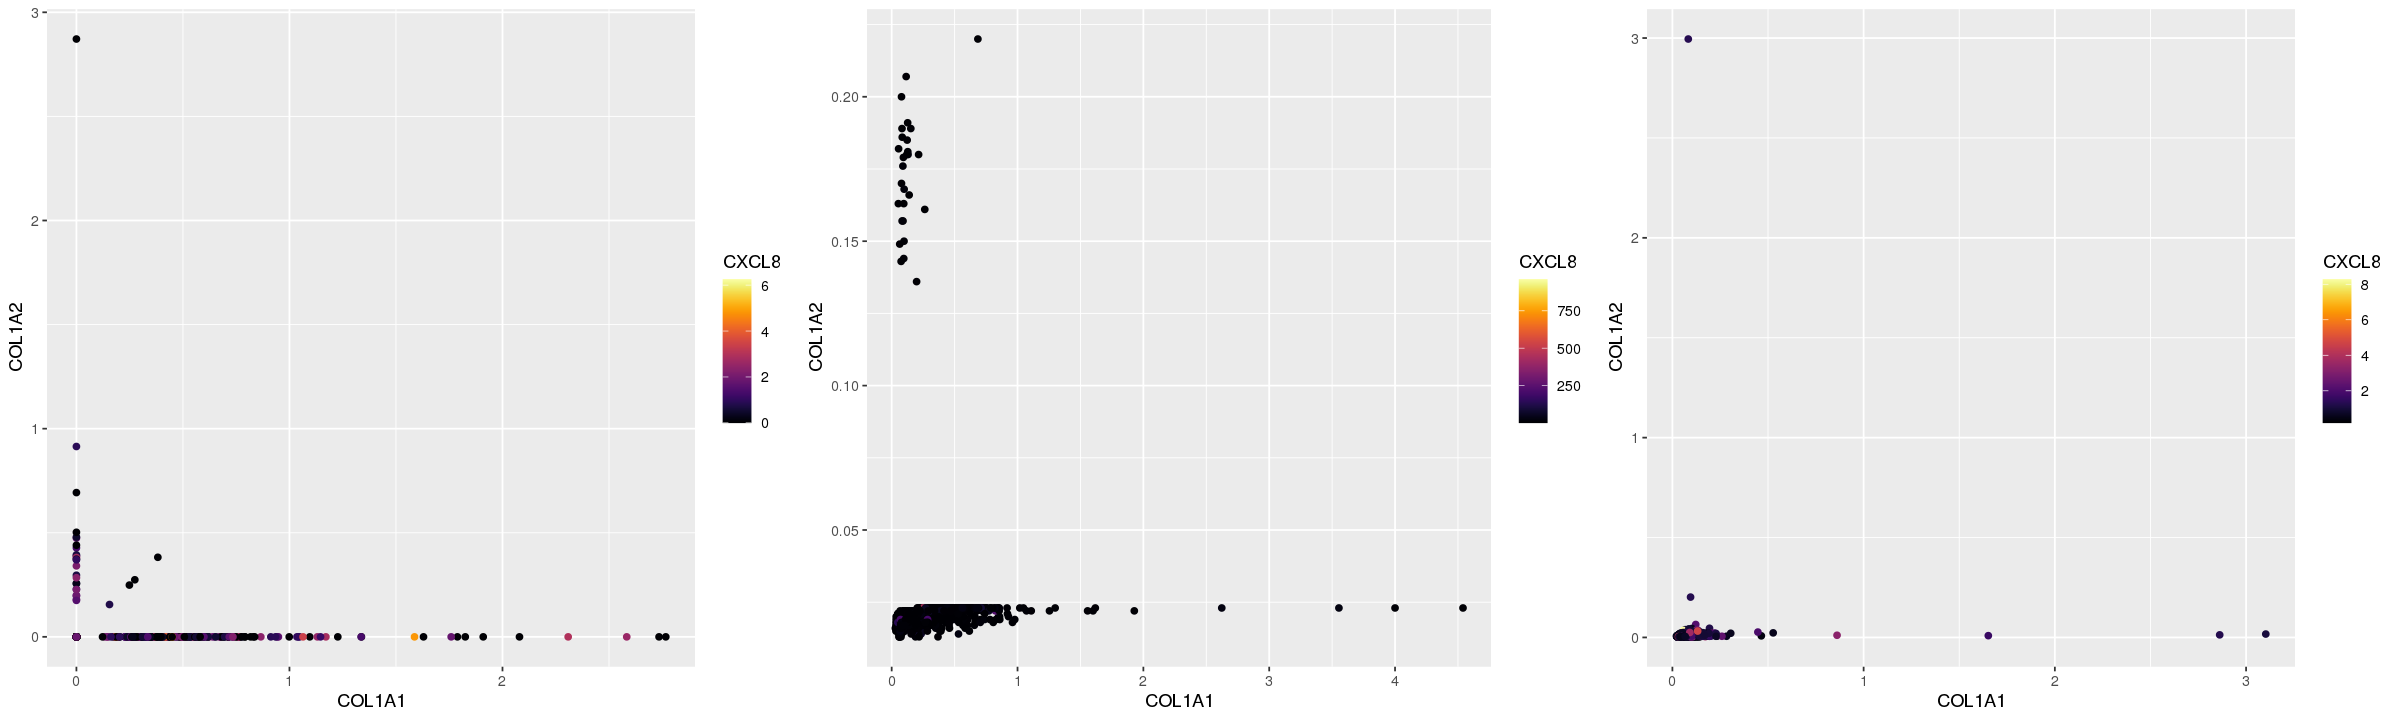

In [20]:
options(repr.plot.width=20, repr.plot.height=6)
plot_grid(ggplot(data.frame(t(scdata@assays$logCPM[Genelist, ]))) +
          geom_point(aes(COL1A1, COL1A2, color=CXCL8)) +
          scale_color_viridis(option="B"),
          ggplot(data.frame(t(cortex.saver$estimate))) +
          geom_point(aes(COL1A1, COL1A2, color=CXCL8)) +
          scale_color_viridis(option="B"),
          ggplot(data.frame(t(cortex2.saver$estimate))) +
          geom_point(aes(COL1A1, COL1A2, color=CXCL8)) +
          scale_color_viridis(option="B"),
          ncol=3)

## CAF517

In [17]:
scdata_caf517 <- readRDS('/mnt/isilonX200/scRNA/Project_4/hho/Rdata/caf517.qc.Rds')

In [18]:
scdata_caf517@assays$logCPM <- (NormalizeData(object = scdata_caf517, verbose = FALSE)@assays$RNA)

In [19]:
cortex_caf517<-scdata_caf517@assays$logCPM@counts
cortex2_caf517<-scdata_caf517@assays$logCPM[]

In [23]:
cortex_caf517.saver <- saver(cortex_caf517, ncores = 64)
cortex2_caf517.saver <- saver(cortex2_caf517, ncores = 64)

33538 genes, 1875 cells

Running SAVER with 64 worker(s)

Calculating predictions for 19400 genes using 10124 genes and 1875 cells...

Start time: 2020-05-05 05:13:37

Estimating finish time...

Finished 64/33538 genes. Approximate finish time: 2020-05-05 05:16:27

Calculating max cor cutoff...

Finished 100/33538 genes. Approximate finish time: 2020-05-05 05:20:52

Calculating lambda coefficients...

Finished 286/33538 genes. Approximate finish time: 2020-05-05 05:22:06

Predicting remaining genes...

Finished 5065/33538 genes. Approximate finish time: 2020-05-05 05:28:50

Predicting remaining genes...

Finished 19400/33538 genes. Approximate finish time: 2020-05-05 05:28:20

Estimating remaining 14138 genes.

Done!

Finish time: 2020-05-05 05:28:48

Total time: 15.1786 mins

33538 genes, 1875 cells

Running SAVER with 64 worker(s)

Calculating predictions for 19400 genes using 5526 genes and 1875 cells...

Start time: 2020-05-05 05:30:21

Estimating finish time...

Finished 64/33538 

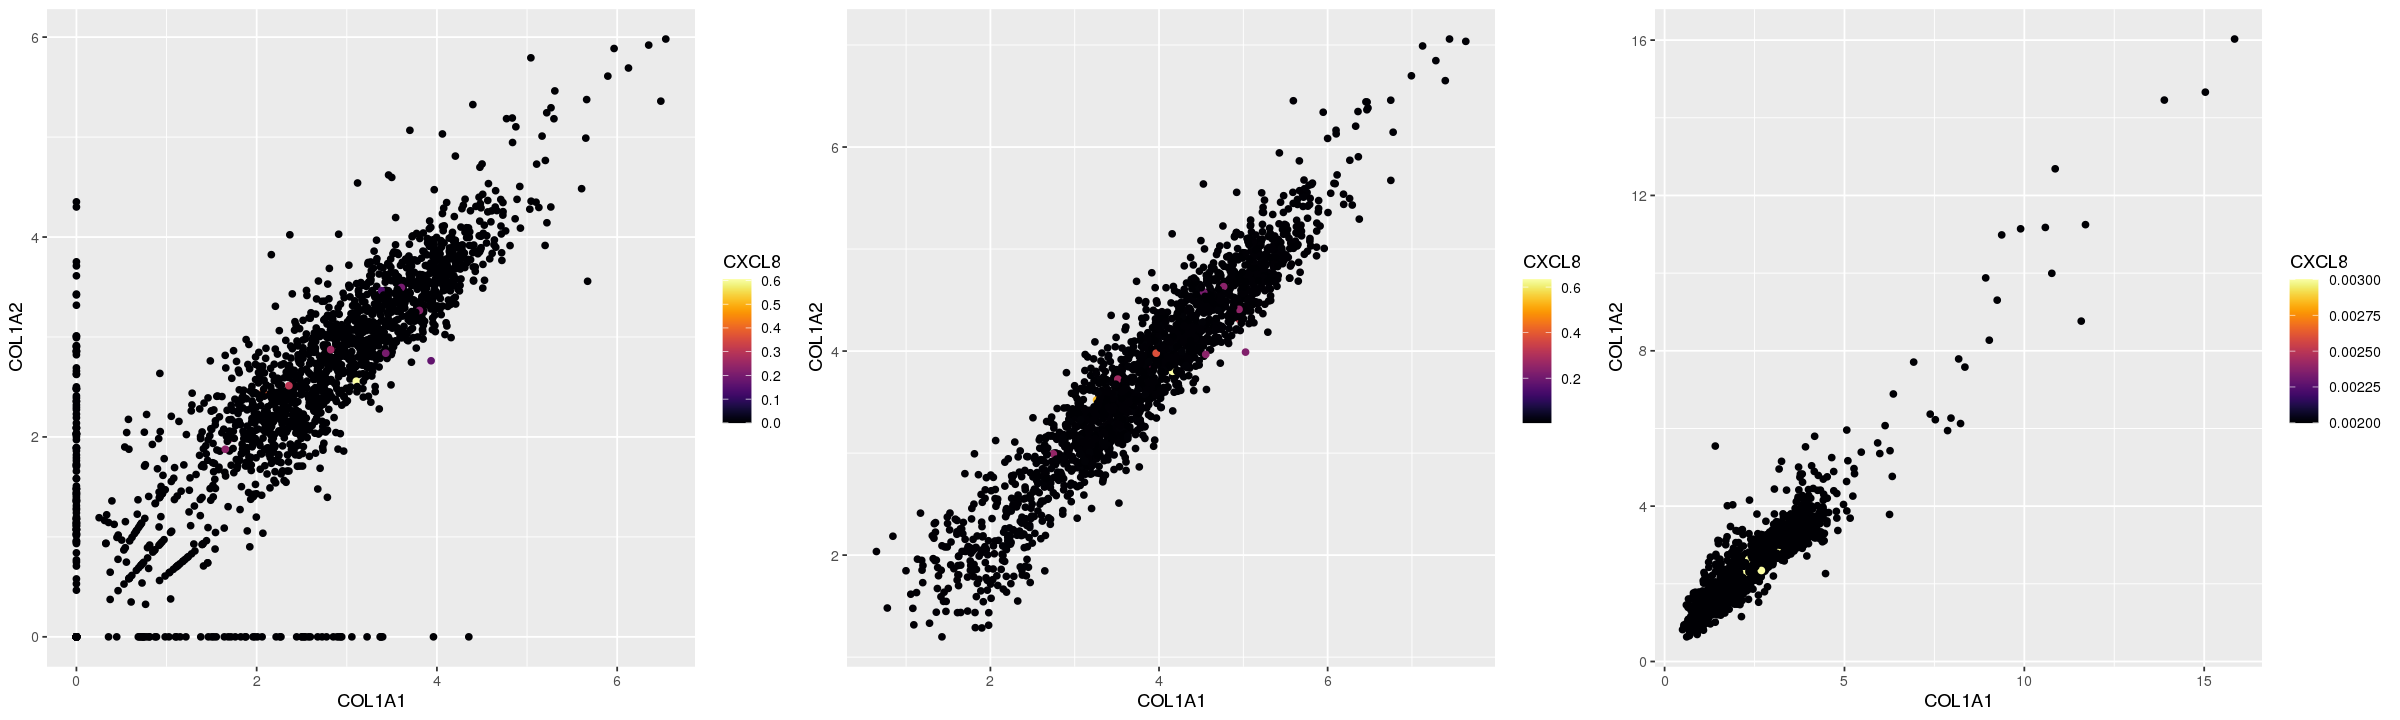

In [25]:
options(repr.plot.width=20, repr.plot.height=6)
plot_grid(ggplot(data.frame(t(scdata_caf517@assays$logCPM[Genelist, ]))) +
          geom_point(aes(COL1A1, COL1A2, color=CXCL8)) +
          scale_color_viridis(option="B"),
          ggplot(data.frame(t(log(cortex_caf517.saver$estimate+1)))) +
          geom_point(aes(COL1A1, COL1A2, color=CXCL8)) +
          scale_color_viridis(option="B"),
          ggplot(data.frame(t(cortex2_caf517.saver$estimate))) +
          geom_point(aes(COL1A1, COL1A2, color=CXCL8)) +
          scale_color_viridis(option="B"),
          ncol=3)

In [26]:
str(cortex_caf517)

Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:7960795] 39 52 53 66 89 154 161 168 178 185 ...
  ..@ p       : int [1:1876] 0 2160 6826 13135 18548 24945 30140 31695 36584 41402 ...
  ..@ Dim     : int [1:2] 33538 1875
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:33538] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. ..$ : chr [1:1875] "AAACCTGGTACCCAAT-CAF517" "AAACGGGAGACGACGT-CAF517" "AAACGGGGTATGAATG-CAF517" "AAACGGGTCCCTGACT-CAF517" ...
  ..@ x       : num [1:7960795] 1 2 3 1 1 5 1 1 1 1 ...
  ..@ factors : list()


In [ ]:
plt.gca().xaxis.set_major_locator(plt.NullLocator()) 
plt.gca().yaxis.set_major_locator(plt.NullLocator()) 
plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0) 
